# Kernel PCA


* Non-linear dimensionality reduction through the use of kernels

[Scikit Learn Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)

[Scikit Learn Reference](http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html)

This is inspired by this [scikit notebook by Mathieu Blondel and Andreas Mueller](http://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py)

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [41]:
from sklearn.datasets import make_circles # makesa a toy data set with large cirle with a smaller one inside
from sklearn.decomposition import PCA, KernelPCA

In [42]:
np.random.seed(0)
# factor = value 0-1 that controls the overlap between the inner and outer circles
X, y = make_circles(n_samples=800, factor=.3, noise=.05) 

In [43]:
# 
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
# Kernel defaults to linear. Not here
# gamma is the kernel coef for rbf and poly kernels - (hy-parm)

X_kernelPCA = kpca.fit_transform(X)  
X_back = kpca.inverse_transform(X_kernelPCA) # When we inverse we get all the pure PC iteself and no guff. 
pca = PCA()
X_pca = pca.fit_transform(X)

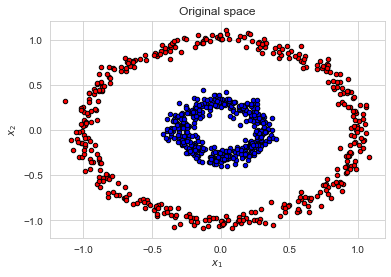

In [44]:
plt.figure()
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$");

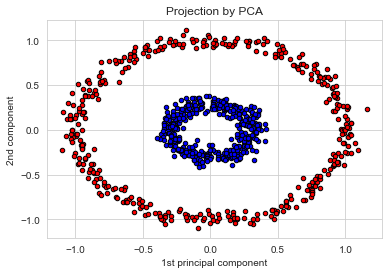

In [45]:
# just plot the PCA now
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component");
# Linear PCA wasnt able to extract any relationship

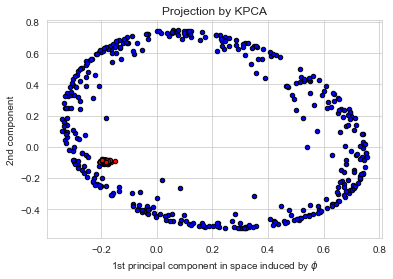

In [47]:
plt.scatter(X_kernelPCA[reds, 0], X_kernelPCA[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kernelPCA[blues, 0], X_kernelPCA[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component");

***

# Kernel PCA Example

Applying it to real world data. Iris dataset

In [63]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa'] 
# sotosa as a class on its own is quite well segrated so
# we are only going to focus on versicolor and virginica

In [64]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col] # all rows and selected colums
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [65]:
kpca = KernelPCA(kernel='rbf', n_components=2) 
X_kernelPCA = kpca.fit_transform(X)                 

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
# Contrast it against Logistic Regression
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [68]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

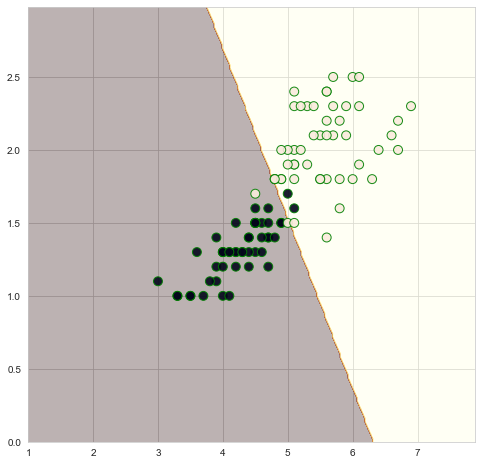

In [69]:
# not the greatest classification with LogReg becasue of a few overlaps.
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

In [70]:
clf.fit(X_kernelPCA, y)

LogisticRegression()

In [71]:
Xv = X_kernelPCA
h = 0.02
x_min, x_max = Xv.min()- 0.5, Xv.max() + 0.5
y_min, y_max = y.min() - 0.5, y.max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

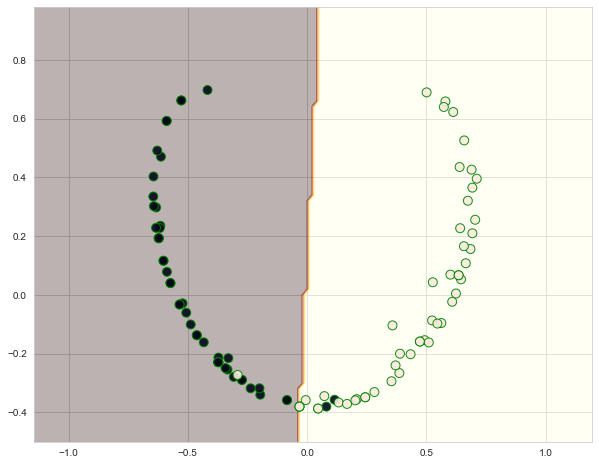

In [73]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(10,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X_kernelPCA[:,0], X_kernelPCA[:,1], c=y, s=80, 
            alpha=0.9, edgecolors='g');
# The horse show is kernel trick. Its a line but not linear. makes it easier for the 
# log regression to segregate the erros. From 8 down to 3 erros